In [8]:
import datajoint as dj
from faker import Faker
fake = Faker()
schema = dj.Schema('Hiring')

In [9]:
@schema
class Manager(dj.Manual):
    definition="""
    manager_id : bigint unsigned  
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint 
    email : varchar(30) 
    """

In [11]:
@schema
class Job(dj.Manual):
    definition = """
    job_id : varchar(12)   
    ---
    job_title : varchar(30) 
    open_date : date 
    end_date : date 
    description : varchar(200) 
    minimum_annual_salary : bigint unsigned  
    maximum_annual_salary : bigint unsigned  
    -> Manager
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [10]:
@schema
class Skill(dj.Lookup):
    definition = """
    skill : varchar(24)
    """
    contents = zip(
        ("SQL", 
         "Java", 
         "Python", 
         "C++", 
         "JavaScript", 
         "R", 
         "Rust"))

In [12]:
@schema
class Applicant(dj.Manual):
    definition = """
    applicant_id : varchar(15) 
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint unsigned  
    email : varchar(30)
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [13]:
@schema
class Application(dj.Manual):
    definition = """
    -> Applicant
    -> Job
    --- 
    current_position : varchar(30) 
    """

In [14]:
@schema
class Interview(dj.Manual):
    definition = """
    -> Application
    ---
    interview_date : date 
    """

In [15]:
@schema
class Offer(dj.Manual):
    definition = """
    -> Interview
    ---
    start_date : date
    salary : bigint unsigned  
    """

In [16]:
@schema
class Acceptance(dj.Manual):
    definition = """
    -> Offer
    --- 
    """

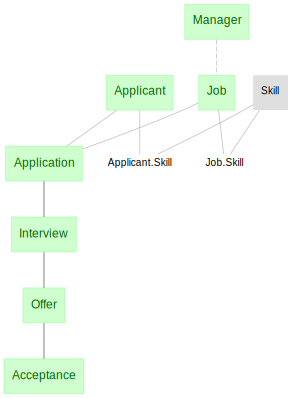

In [17]:
dj.Diagram(schema)

In [3]:
schema.drop()

Populate

In [35]:
import random
from tqdm import tqdm
from faker import Faker
fake = Faker()

In [18]:
Manager.insert(dict(
    manager_id=fake.random_int(100000, 900000),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(10))

In [19]:
Manager()

manager_id,first_name,last_name,phone,email
409503,Sandra,Kelley,86954320926,daviskatelyn@example.com
469720,Henry,Mcdowell,75388459223,jeremiahhenderson@example.org
514378,Jay,Deleon,14794387787,jessicajackson@example.org
546399,Tammy,Duke,20243030955,alexandramoore@example.com
605221,Craig,Kelly,50304593671,lauriediaz@example.org
728468,Amy,Moreno,84659570994,haley31@example.net
777937,Deborah,Velez,30406548878,aparker@example.com
788478,Elizabeth,Mejia,57705796767,lpowell@example.com
801062,Linda,Ramos,91783602615,larry06@example.org
892699,Melissa,Mejia,76407561168,adam88@example.org


In [29]:
keys = Manager.fetch("KEY")

In [40]:
Job.insert(
    dict(
    random.choice(keys),
    job_id=fake.pystr_format(),
    job_title=fake.text("programmer","analyst","data scientist","engineer","Admin"),
    open_date=fake.date(),
    end_date=fake.date(),
    description=fake.text(),
    minimum_annual_salary=fake.random_int(400000,800000),
    maximum_annual_salary=fake.random_int(1000000,6000000)) for _ in range(30))

TypeError: text() takes from 1 to 3 positional arguments but 6 were given

In [32]:
Job()

job_id,job_title,open_date,end_date,description,minimum_annual_salary,maximum_annual_salary,manager_id


In [43]:
Applicant()

applicant_id,first_name,last_name,phone,email
A5-0728647C,James,Collins,99308623447,johnthompson@example.org
a8-3392020L,Julia,Kirk,98584486494,hmercer@example.net
B0-0404609l,Paul,Carlson,64231624792,brookeolson@example.org
C4-2659983I,Amy,Bailey,43207381861,ojohnson@example.org
C5-2079481O,Steven,Wilson,79986282565,origgs@example.org
e0-470378A,Evelyn,Riley,81815620324,hutchinsongregory@example.net
e4-9216456o,Barbara,Davis,50179719245,hallkaren@example.org
G0-4137274G,Jessica,Yang,18340684639,scottmorris@example.net
G5-1239953U,Holly,Johnson,76364870416,johnsondavid@example.com
H8-6723033K,Jessica,Kennedy,36324149749,chelsealogan@example.net


In [42]:
Applicant.insert(dict(
    applicant_id=fake.pystr_format(),
    first_name=fake.first_name(),
    last_name=fake.last_name(),
    phone=fake.random_int(1_000_000_0000, 9_999_999_9999),
    email=fake.email()) for _ in range(50))